In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height_weight.csv")

In [3]:
df.head()

,Weight,Height
0,83.962640,174.967142
1,72.205972,168.617357
2,79.097607,176.476885
3,88.127373,185.230299
4,69.614647,167.658466


Text(0, 0.5, 'Height')

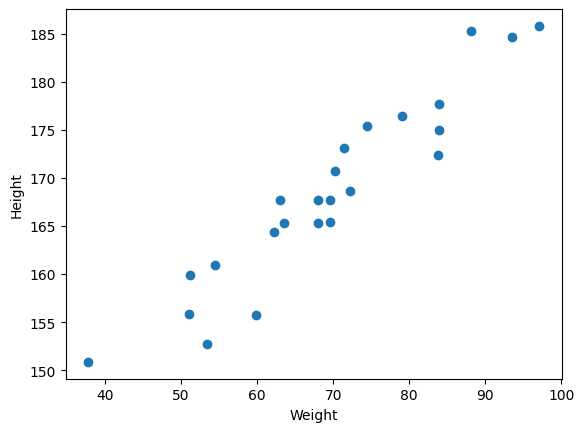

In [4]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
## Correlation
df.corr()

,Weight,Height
Weight,1.00000,0.94903
Height,0.94903,1.00000


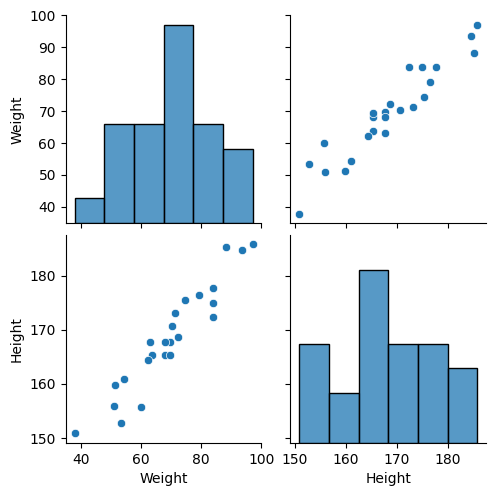

In [6]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
## Independent and dependent features
X = df[['Weight']] ## Independent features should be data frame or 2 dimensional array
y=df['Height'] ## This varialble can be series form or 1 dimesional array

In [8]:
X_series = df['Weight']
np.array(X_series).shape

(24,)

In [9]:
np.array(y).shape

(24,)

In [10]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
X_test

array([[-0.18346426],
       [-1.32152166],
       [ 0.88964854],
       [-1.10094717],
       [-0.48254763],
       [ 0.24716936]])

In [15]:
### Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression(n_jobs=-1)

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
regression.coef_

array([9.89579799])

In [20]:
print("Coefficient or slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or slope :  [9.89579799]
Intercept :  169.0408146649092


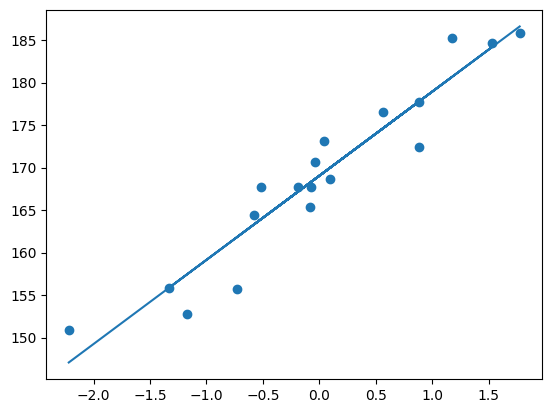

In [21]:
## Plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. predicted height output  = intercept + coef_(Weights)
2. y_pred_test = 169.0408146649092 + 9.89579799(X_test)

In [22]:
## Prediction for test dfata
y_pred = regression.predict(X_test)

In [23]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8.601627764692806
2.749249806979089
2.932853178168455


## R Square
Formula
#### R^2 = 1 - SSR/SST
R^2 = coefficient of determination SSR  = sum of squares of residuals SST = total sum of squares

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_pred)
print(score)

0.773504614422586


In [27]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7168807680282325

In [28]:
## OLS Linear Regression
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train,X_train).fit()

In [30]:
prediction = model.predict(X_test)
print(prediction)

[ -1.8155253  -13.07751139   8.80378222 -10.89475079  -4.77519384
   2.44593805]


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.055
Method:                 Least Squares   F-statistic:                            0.05824
Date:                Thu, 03 Apr 2025   Prob (F-statistic):                       0.812
Time:                        12:42:56   Log-Likelihood:                         -117.89
No. Observations:                  18   AIC:                                      237.8
Df Residuals:                      17   BIC:                                      238.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/blackbasil/projects/ai-ml/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [33]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/home/blackbasil/projects/ai-ml/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([169.86724348])